# Phân tích EDA - Exploratory Data Analyst


- Trần Thị Kim Ngân - K214132012
- Nguyễn Ngọc Hiệp - K214132005
- Trịnh Minh Chuẩn - K214132002


---

## Import thư viên

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import csv

from collections import Counter
pd.options.mode.chained_assignment = None


---

# 1. Mô tả - thu thập dữ liệu

Dữ liệu được sử dụng trong bài tập này là dữ liệu khảo sát các lập trình viên của trang StackOverflow. Mình download dữ liệu [ở đây](https://drive.google.com/file/d/1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB/view)

Theo mô tả trong file "README_2020.txt" của StackOverflow:
>The enclosed data set is the full, cleaned results of the 2020 Stack Overflow Developer Survey. Free response submissions and personally identifying information have been removed from the results to protect the privacy of respondents. There are three files besides this README:
>
>1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
>2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
>3. so_survey_2020.pdf - PDF file of survey instrument
>
>The survey was fielded from February 5 to February 28, 2020. The median time spent on the survey for qualified responses was 16.6 minutes.
>
>Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

File "survey_results_public-short.csv" là file dữ liệu chính mà chúng ta sẽ làm trong bài tập này. Ngoài ra, chúng ta còn đính kèm 2 file phụ: (1) file "survey_results_schema.csv" là file cho biết ý nghĩa của các cột, và (2) file "so_survey_2020.pdf" là file khảo sát gốc của StackOverflow.

Để ý: 
- Dữ liệu này không đại diện được cho cộng đồng lập trình viên trên toàn thế giới, mà chỉ giới hạn trong tập những lập trình viên thực hiện khảo sát của StackOverflow. Những câu trả lời có được thông qua tập dữ liệu này cũng sẽ bị giới hạn trong phạm vi đó.
- Dữ liệu có đúng không? Về cơ bản là ta không biết được.

Cũng theo file "README_2020.txt", dữ liệu này được StackOverflow public với license như sau:
>This database - The Public 2020 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/
>
>TLDR: You are free to share, adapt, and create derivative works from The Public 2020 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.


---

## 2 Khám phá dữ liệu

### 2.1 Đọc dữ liệu từ file

Đầu tiên, chúng ta viết code để đọc dữ liệu từ file "survey_results_public.csv" và lưu kết quả vào DataFrame `survey_df`; ta thống nhất là sẽ để file dữ liệu này cùng cấp với file notebook và khi đọc file thì chỉ truyền vào tên của file. Ngoài ra, chúng ta cũng cần cho cột `Respondent` (id của người làm khảo sát) làm cột index của `survey_df`.

In [2]:
survey_df = pd.read_csv('survey_results_public.csv')
index = survey_df['Respondent']
del survey_df['Respondent'] 
survey_df.index = index 


In [3]:
# Hiện thông tin những dòng đầu của bộ dữ liệu
survey_df.head()

MainBranch Hobbyist   Age  \
Respondent                                                                     
1                              I am a developer by profession      Yes   NaN   
2                              I am a developer by profession       No   NaN   
3                                 I code primarily as a hobby      Yes   NaN   
4                              I am a developer by profession      Yes  25.0   
5           I used to be a developer by profession, but no...      Yes  31.0   

           Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
Respondent                                                                     
1                  13  Monthly        NaN            NaN             Germany   
2                  19      NaN        NaN            NaN      United Kingdom   
3                  15      NaN        NaN            NaN  Russian Federation   
4                  18      NaN        NaN            NaN             Albania   
5                  16      NaN        NaN            NaN       United States   

              CurrencyDesc CurrencySymbol  ...                  SurveyEase  \
Respondent                                 ...                               
1            European Euro            EUR  ...  Neither easy nor difficult   
2           Pound sterling            GBP  ...                         NaN   
3                      NaN            NaN  ...  Neither easy nor difficult   
4             Albanian lek            ALL  ...                         NaN   
5                      NaN            NaN  ...                        Easy   

                     SurveyLength Trans  \
Respondent                                
1           Appropriate in length    No   
2                             NaN   NaN   
3           Appropriate in length   NaN   
4                             NaN    No   
5                       Too short    No   

                                               UndergradMajor  \
Respondent                                                      
1           Computer science, computer engineering, or sof...   
2           Computer science, computer engineering, or sof...   
3                                                         NaN   
4           Computer science, computer engineering, or sof...   
5           Computer science, computer engineering, or sof...   

           WebframeDesireNextYear    WebframeWorkedWith  \
Respondent                                                
1                    ASP.NET Core  ASP.NET;ASP.NET Core   
2                             NaN                   NaN   
3                             NaN                   NaN   
4                             NaN                   NaN   
5            Django;Ruby on Rails         Ruby on Rails   

                                       WelcomeChange WorkWeekHrs YearsCode  \
Respondent                                                                   
1            Just as welcome now as I felt last year        50.0        36   
2           Somewhat more welcome now than last year         NaN         7   
3           Somewhat more welcome now than last year         NaN         4   
4           Somewhat less welcome now than last year        40.0         7   
5            Just as welcome now as I felt last year         NaN        15   

           YearsCodePro  
Respondent               
1                    27  
2                     4  
3                   NaN  
4                     4  
5                     8  

[5 rows x 60 columns]

### 2.2 Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Kế đến, chúng ta tính số dòng và số cột của DataFrame `survey_df` và lần lượt lưu vào biến `num_rows` và `num_cols`. 

In [4]:
num_rows = survey_df.shape[0]
num_cols = survey_df.shape[1]
print (num_rows)
print (num_cols)

64461
60


### 2.3 Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo file "README_2020.txt" cũng như theo quan sát sơ bộ về dữ liệu, mỗi dòng trong DataFrame `survey_df` cho biết kết quả làm khảo sát của một người. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau. 

### 2.4 Dữ liệu có các dòng bị lặp không?

Kế đến, chúng ta tính số dòng có index (id của người làm khảo sát) bị lặp và lưu vào biến `num_duplicated_rows`. Trong nhóm các dòng có index giống nhau thì dòng đầu tiên không tính là bị lặp.

In [123]:
survey_df_index = survey_df[~survey_df.index.duplicated(keep='first')]
num_duplicated_rows = survey_df_index.shape[0] - survey_df.shape[0] 

### 2.5 Mỗi cột có ý nghĩa gì?

Để xem ý nghĩa của mỗi cột thì:
- Trước tiên, chúng ta cần đọc file "survey_results_schema-short.csv" vào DataFrame `col_meaning_df`; chúng ta cũng cần cho cột "Column" làm cột index. 
- Sau đó, chúng ta chỉ cần hiển thị DataFrame `col_meaning_df` ra để xem 
- Cột "QuestionText": các chuỗi mô tả bị cắt do quá dài. Do đó, trước khi hiển thị DataFrame `col_meaning_df`, chúng ta cũng cần chỉnh sao đó để các chuỗi mô tả không bị cắt.   

In [124]:
col_meaning_df = pd.read_csv('survey_results_schema.csv')
index = col_meaning_df['Column']
del col_meaning_df['Column'] 
col_meaning_df.index = index 
pd.set_option("display.max_colwidth",1000)


In [125]:
col_meaning_df

QuestionText
Column                                                                                                                                                                                                                                                                   
Respondent                                                                                                                                                                                         Randomized respondent ID number (not in order of survey response time)
MainBranch                                                                                                                                               Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
Hobbyist                                                                                                                                                                                                                                          Do you code as a hobby?
Age                                                                                                                                                                          What is your age (in years)? If you prefer not to answer, you may leave this question blank.
Age1stCode                                                                                                                                                    At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)
...                                                                                                                                                                                                                                                                   ...
WebframeWorkedWith  Which web frameworks have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)
WelcomeChange                                                                                                                                                                                           Compared to last year, how welcome do you feel on Stack Overflow?
WorkWeekHrs                                                                                                                                                                      On average, how many hours per week do you work? Please enter a whole number in the box.
YearsCode                                                                                                                                                                                          Including any education, how many years have you been coding in total?
YearsCodePro                                                                                                                                                              NOT including education, how many years have you coded professionally (as a part of your work)?

[61 rows x 1 columns]

In [126]:
schema_raw = col_meaning_df.QuestionText
schema_raw

Column
Respondent                                                                                                                                                                                           Randomized respondent ID number (not in order of survey response time)
MainBranch                                                                                                                                                 Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
Hobbyist                                                                                                                                                                                                                                            Do you code as a hobby?
Age                                                                                                                                                                            What is your a

Trước khi đi tiếp, chúng ta nên đọc kết quả hiển thị ở trên và đảm bảo là chúng ta đã hiểu ý nghĩa của các cột. Để hiểu ý nghĩa của cột, có thể chúng ta sẽ cần xem thêm các giá trị của cột bên DataFrame `survey_df`. 

## 3. Data Preprocessing & Cleaning with Pandas

Mặc dù các câu trả lời khảo sát chứa rất nhiều thông tin nhưng chúng tôi sẽ giới hạn phân tích của mình ở các lĩnh vực sau:

- Nhân khẩu học của người trả lời khảo sát và cộng đồng lập trình toàn cầu
- Phân phối kỹ năng, kinh nghiệm và sở thích lập trình
- Thông tin, sở thích và ý kiến liên quan đến việc làm

Hãy chọn một tập hợp con các cột có dữ liệu liên quan để phân tích.


In [127]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt',
    'ConvertedComp'
]

In [128]:
len(selected_columns)

21

In [129]:
survey_df = survey_df[selected_columns].copy()
schema = schema_raw[selected_columns]
survey_df.shape

(45384, 21)

### 3.1 Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Kế đến, chúng ta tính kiểu dữ liệu (dtype) của mỗi cột trong DataFrame `survey_df` và lưu kết quả vào Series `dtypes` (Series này có index là tên cột). 

In [12]:
data = []
for i in survey_df.columns:
    data.append(survey_df[i].dtype)
_Series = dict(zip(survey_df.columns, data))
dtypes = pd.Series(_Series)
dtypes

Country                    object
Age                       float64
Gender                     object
EdLevel                    object
UndergradMajor             object
Hobbyist                   object
Age1stCode                 object
YearsCode                  object
YearsCodePro               object
LanguageWorkedWith         object
LanguageDesireNextYear     object
NEWLearn                   object
NEWStuck                   object
Employment                 object
DevType                    object
WorkWeekHrs               float64
JobSat                     object
JobFactors                 object
NEWOvertime                object
NEWEdImpt                  object
ConvertedComp             float64
dtype: object

Như chúng ta có thể thấy, cột "Age1stCode", "YearsCode" và "YearsCodePro" nên có kiểu dữ liệu số, nhưng hiện giờ đang có kiểu dữ liệu object. Ta hãy thử xem thêm về các giá trị 3 cột này. 

In [13]:
survey_df['Age1stCode'].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [14]:
survey_df['YearsCode'].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [15]:
survey_df['YearsCodePro'].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

Ta nên đưa 2 cột này về dạng số để có thể tiếp tục khám phá (tính min, median, max, ...).

---

### 3.2 Tiền xử lý

Chúng ta sẽ thực hiện tiền xử lý để chuyển 3 cột "Age1stCode", "YearsCode" và "YearsCodePro" về dạng số (float). Trong đó: "Less than 1 year" $\to$ 0, "More than 50 years" $\to$ 51 ; 'Older than 85' $\to$ 86 , "Younger than 5 years" $\to$ 4 . Sau khi chuyển thì `survey_df.dtypes` sẽ thay đổi.

In [130]:
more_ayc = survey_df[survey_df.Age1stCode == 'Older than 85'].index
for i in more_ayc:
    survey_df.at[i, 'Age1stCode'] = 86
more_yc = survey_df[survey_df.YearsCode == 'More than 50 years'].index
for i in more_yc:
    survey_df.at[i, 'YearsCode'] = 51
more_ycp = survey_df[survey_df.YearsCodePro == 'More than 50 years'].index
for i in more_ycp:
    survey_df.at[i, 'YearsCodePro'] = 51


less_ayc = survey_df[survey_df.Age1stCode == 'Younger than 5 years'].index
for i in less_ayc:
    survey_df.at[i, 'Age1stCode'] = 4
less_yc = survey_df[survey_df.YearsCode == 'Less than 1 year'].index
for i in less_yc:
    survey_df.at[i, 'YearsCode'] = 0
less_ycp = survey_df[survey_df.YearsCodePro == 'Less than 1 year'].index
for i in less_ycp:
    survey_df.at[i, 'YearsCodePro'] = 0

survey_df['Age1stCode'] = pd.to_numeric(survey_df['Age1stCode'])
survey_df['YearsCodePro'] = pd.to_numeric(survey_df['YearsCodePro'])
survey_df['YearsCode'] = pd.to_numeric(survey_df['YearsCode'])

Bây giờ chúng ta hãy xem một số thống kê cơ bản về các cột số.

In [131]:
survey_df.describe()

Age    Age1stCode     YearsCode  YearsCodePro   WorkWeekHrs  \
count  40822.000000  45212.000000  45115.000000  37711.000000  36211.000000   
mean      30.777782     15.324272     12.938468      8.514916     40.230188   
std        8.936169      4.946416      9.481704      7.782064     11.468339   
min       11.000000      4.000000      0.000000      0.000000      1.000000   
25%       24.000000     12.000000      6.000000      3.000000     40.000000   
50%       29.000000     15.000000     10.000000      6.000000     40.000000   
75%       35.000000     18.000000     18.000000     12.000000     43.000000   
max       99.000000     86.000000     51.000000     51.000000    168.000000   

       ConvertedComp  
count   3.113600e+04  
mean    1.034111e+05  
std     2.244710e+05  
min     0.000000e+00  
25%     2.585200e+04  
50%     5.404900e+04  
75%     9.500000e+04  
max     2.000000e+06

---

### 3.3 Quay lại bước khám phá dữ liệu 

#### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

Với các cột có kiểu dữ liệu số, bạn sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Bạn sẽ lưu kết quả vào DataFrame `nume_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `survey_df`
- Tên của các dòng là: "missing_percentage", "min", "lower_quartile", "median", "upper_quartile", "max"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [18]:
data_float = {}
keys = []
Series = survey_df.dtypes
for i in range(0,len(Series)):
    if Series[i] == np.float64:
        keys.append(Series.index[i])
for i in range(0 , len(keys)):
    data_float.update({keys[i] : [None] })
keys = list(map(str, keys))
nume_col_info_df = pd.DataFrame (data = data_float , index = ['missing_percentage', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for key in keys :
    nume_col_info_df.at['missing_percentage' , key] = round((100 - ((survey_df[key].count())/len(survey_df)) * 100) , 1)
    nume_col_info_df.at['min' , key] = round(survey_df[key].min(),0)
    nume_col_info_df.at['lower_quartile' , key] = round(survey_df[key].quantile(0.25) ,0)
    nume_col_info_df.at['median' , key] = round(survey_df[key].quantile(0.5),0)
    nume_col_info_df.at['upper_quartile' , key] = round(survey_df[key].quantile(0.75),0)
    nume_col_info_df.at['max' , key] = round(survey_df[key].max(),0)
print (nume_col_info_df)

                      Age Age1stCode YearsCode YearsCodePro WorkWeekHrs  \
missing_percentage   29.5       10.2      10.5         28.1        36.2   
min                   1.0        4.0       0.0          0.0         1.0   
lower_quartile       24.0       12.0       6.0          3.0        40.0   
median               29.0       15.0      10.0          6.0        40.0   
upper_quartile       35.0       18.0      17.0         12.0        44.0   
max                 279.0       86.0      51.0         51.0       475.0   

                   ConvertedComp  
missing_percentage          46.1  
min                          0.0  
lower_quartile           24648.0  
median                   54049.0  
upper_quartile           95000.0  
max                    2000000.0  


**Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**
- Cột "Age": Chúng ta hãy tính số lượng giá trị không hợp lệ của cột "Age" (< giá trị tương ứng trong cột "YearsCode" HOẶC < giá trị tương ứng trong cột "YearsCodePro") và lưu kết quả vào biến `num_invalid_Age_vals`.

- Cột "Age": Ta thấy giá trị tối thiểu là 1 và tối đa là 279. Cách khắc  đơphụcn giản là bỏ qua các hàng có độ tuổi cao hơn 100 tuổi hoặc thấp hơn 10 tuổi vì phản hồi khảo sát không hợp lệ. Chúng ta có thể thực hiện việc này bằng phương thức .drop, như ở đây.

- Cột "WorkWeekHrs" (số giờ làm việc trung bình một tuần): ta thấy max là 475 giờ! Trong khi đó, 7 ngày * 24 giờ = 168 giờ! Bạn hãy tính số lượng giá trị không hợp lệ của cột "WorkWeekHrs" (> 24 * 7) và lưu kết quả vào biến `num_invalid_WorkWeekHrs`.

- Cột "YearsCode": bạn hãy tính số lượng giá trị không hợp lệ của cột "YearsCode" (< giá trị tương ứng trong cột "YearsCodePro" HOẶC > giá trị tương ứng trong cột "Age") và lưu kết quả vào biến `num_invalid_YearsCode`.

- Cột "YearsCodePro": bạn hãy tính số lượng giá trị không hợp lệ của cột "YearsCodePro" (> giá trị tương ứng trong cột "YearsCode" HOẶC > giá trị tương ứng trong cột "Age") và lưu kết quả vào biến `num_invalid_YearsCodePro`.



In [19]:
num_invalid_Age = survey_df[(survey_df['Age'] < survey_df['YearsCode']) | (survey_df['Age'] < survey_df['YearsCodePro'])]
num_invalid_Age_vals = num_invalid_Age.shape[0]

num_invalid_WorkWeekHrs = survey_df[survey_df['WorkWeekHrs'] > 24*7]
num_invalid_WorkWeekHrs_vals = num_invalid_WorkWeekHrs.shape[0]

num_invalid_YearsCode = survey_df[(survey_df['YearsCode'] < survey_df['YearsCodePro']) | (survey_df['YearsCode'] > survey_df['Age'])]
num_invalid_YearsCode_vals = num_invalid_YearsCode.shape[0]

num_invalid_YearsCodePro = survey_df[(survey_df['YearsCodePro'] > survey_df['YearsCode']) | (survey_df['YearsCodePro'] > survey_df['Age'])]
num_invalid_YearsCodePro_vals = num_invalid_YearsCodePro.shape[0]

num_invalid_Age_work = survey_df[(survey_df['Age'] < 10) | (survey_df['Age'] > 100)]
num_invalid_Age_work_vals = num_invalid_Age_work.shape[0]
num_invalid_Age_work_vals

10

Do số lượng các giá trị không hợp lệ cũng khá ít nên ta có thể tiền xử lý bằng cách xóa các dòng chứa các giá trị không hợp lệ.

---

### 3.5 Tiền xử lý

Chúng ta sẽ thực hiện tiền xử lý để xóa đi các dòng của DataFrame `survey_df` mà chứa ít nhất là một giá trị không hợp lệ. Sau khi tiền xử lý thì `survey_df` sẽ thay đổi. 

In [20]:
temp = pd.concat([num_invalid_Age, num_invalid_WorkWeekHrs , num_invalid_YearsCode , num_invalid_YearsCodePro , num_invalid_Age_work])
temp_index = temp[~temp.index.duplicated(keep='first')]
survey_df = survey_df.drop(temp_index.index)

---

### 3.6 Quay lại bước khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào? (1đ)

Với các cột có kiểu dữ liệu không phải số, chúng ta sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà ứng với câu hỏi dạng multichoice (ví dụ, cột "DevType"), mỗi giá trị có thể chứa nhiều choice (các choice được phân tách bởi dấu chấm phẩy), và việc đếm trực tiếp các giá trị không có nhiều ý nghĩa lắm vì số lượng tổ hợp các choice là khá nhiều; một cách khác tốt hơn mà bạn sẽ làm là đếm số lượng các choice
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %; với cột mà ứng với câu hỏi dạng multichoice, cách làm tương tự như ở trên

Bạn sẽ lưu kết quả vào DataFrame `cate_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột không phải số trong `survey_df`
- Tên của các dòng là: "missing_percentage", "num_values", "value_percentages"  

Để dễ nhìn, tất cả các giá trị chúng ta đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [21]:
multichoice_cols = ['DevType', 'Gender', 'JobFactors', 
                    'LanguageWorkedWith', 'LanguageDesireNextYear', 
                    'MiscTechWorkedWith', 'MiscTechDesireNextYear', 
                    'NEWCollabToolsWorkedWith', 'NEWCollabToolsDesireNextYear', 
                    'PlatformWorkedWith', 'PlatformDesireNextYear', 
                    'NEWStuck']

In [22]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn

data_obj = {}
keys_obj = []
Series_obj = survey_df.dtypes
for i in range(0,len(Series)):
    if Series_obj[i] == np.object0:
        keys_obj.append(Series.index[i])
for i in range(0 , len(keys_obj)):
    data_obj.update({keys_obj[i] : [None , None , {None:None}]})

index_obj = ["missing_percentage", "num_values", "value_percentages"]
cate_col_info_df = pd.DataFrame(data = data_obj , index = index_obj)

keys_obj = list(map(str, keys_obj))


for key_obj in keys_obj :
    new = []    
    temp_df = survey_df[key_obj].dropna()
    Series_value = temp_df.values
    for i in range(0,len(Series_value)):
        new += Series_value[i].split(';')
    lenth = len(list(set(new)))
    c = Counter(new)
    for i in c.keys():
        c[i] = round((c[i]/len(new))*100 , 1)
    cate_col_info_df.at['missing_percentage' , key_obj] = round((100 - ((survey_df[key_obj].count())/len(survey_df)) * 100) , 1)
    cate_col_info_df.at['num_values' , key_obj] = lenth
    cate_col_info_df.at['value_percentages' , key_obj] = c

cate_col_info_df

Country  \
missing_percentage                                                                                                  0.6   
num_values                                                                                                          183   
value_percentages   {'Germany': 6.1, 'United Kingdom': 6.1, 'Russian Federation': 1.7, 'Albania': 0.1, 'United State...   

                                                                                                   Gender  \
missing_percentage                                                                                   21.5   
num_values                                                                                              3   
value_percentages   {'Man': 90.8, 'Woman': 7.9, 'Non-binary, genderqueer, or gender non-conforming': 1.2}   

                                                                                                                EdLevel  \
missing_percentage                                                                                                 11.0   
num_values                                                                                                            9   
value_percentages   {'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 22.8, 'Bachelor’s degree (B.A., B.S., B.Eng....   

                                                                                                         UndergradMajor  \
missing_percentage                                                                                                 20.9   
num_values                                                                                                           12   
value_percentages   {'Computer science, computer engineering, or software engineering': 62.0, 'Mathematics or statis...   

                                     Hobbyist  \
missing_percentage                        0.1   
num_values                                  2   
value_percentages   {'Yes': 78.2, 'No': 21.8}   

                                                                                                     LanguageWorkedWith  \
missing_percentage                                                                                                 11.0   
num_values                                                                                                           25   
value_percentages   {'C#': 6.3, 'HTML/CSS': 12.6, 'JavaScript': 13.5, 'Swift': 1.2, 'Objective-C': 0.8, 'Python': 8....   

                                                                                                 LanguageDesireNextYear  \
missing_percentage                                                                                                 16.0   
num_values                                                                                                           25   
value_percentages   {'C#': 5.7, 'HTML/CSS': 8.7, 'JavaScript': 11.0, 'Python': 11.2, 'Swift': 2.4, 'Objective-C': 0....   

                                                                                                               NEWLearn  \
missing_percentage                                                                                                 12.9   
num_values                                                                                                            4   
value_percentages   {'Once a year': 36.9, 'Once a decade': 2.2, 'Every few months': 37.3, 'Once every few years': 23.7}   

                                                                                                               NEWStuck  \
missing_percentage                                                                                                 14.7   
num_values                                                                                                            9   
value_percentages   {'Visit Stack Overflow': 26.7, 'Go for a walk or other physical activity': 12.8, 'Do other work ...   

                           

In [23]:
survey_df['Gender'].value_counts()

Man                                                            45636
Woman                                                           3819
Non-binary, genderqueer, or gender non-conforming                379
Man;Non-binary, genderqueer, or gender non-conforming            120
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         71
Woman;Man;Non-binary, genderqueer, or gender non-conforming       23
Name: Gender, dtype: int64

Chúng ta có thể thấy cột "Gender" có nhiều giá trị, tuy nhiên chúng chỉ phân thành 3 loại chính. Chúng tôi sẽ xóa các giá trị chứa nhiều tùy chọn để đơn giản hóa việc phân tích của chúng tôi.

In [24]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

# 4. Exploratory Analysis and Visualization

Trước khi chúng ta đặt câu hỏi về các câu trả lời khảo sát, sẽ giúp hiểu được nhân khẩu học của người trả lời, tức là quốc gia, độ tuổi, giới tính, trình độ học vấn, trình độ việc làm, v.v. Điều cần thiết là phải khám phá các biến số này để hiểu mức độ đại diện của cuộc khảo sát đối với đối tượng. cộng đồng lập trình trên toàn thế giới. Một cuộc khảo sát ở quy mô này thường có xu hướng có một số sai lệch lựa chọn.

Hãy bắt đầu bằng cách nhập `matplotlib.pyplot` và `seaborn`.

In [132]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 4.1 Country

Chúng ta hãy xem số lượng quốc gia có phản hồi trong cuộc khảo sát và vẽ biểu đồ mười quốc gia có số lượng phản hồi cao nhất.

In [134]:
schema_raw.Country

'Where do you live?'

In [135]:
survey_df.Country.nunique()

170

Chúng ta có thể xác định các quốc gia có số lượng người trả lời cao nhất bằng phương pháp value_counts.

In [136]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         9493
India                 4760
Germany               3004
United Kingdom        2963
Canada                1660
France                1397
Brazil                1324
Netherlands           1016
Poland                 997
Australia              924
Spain                  883
Italy                  856
Russian Federation     779
Sweden                 674
Turkey                 520
Name: Country, dtype: int64

Chúng ta có thể hình dung thông tin này bằng biểu đồ thanh.

<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

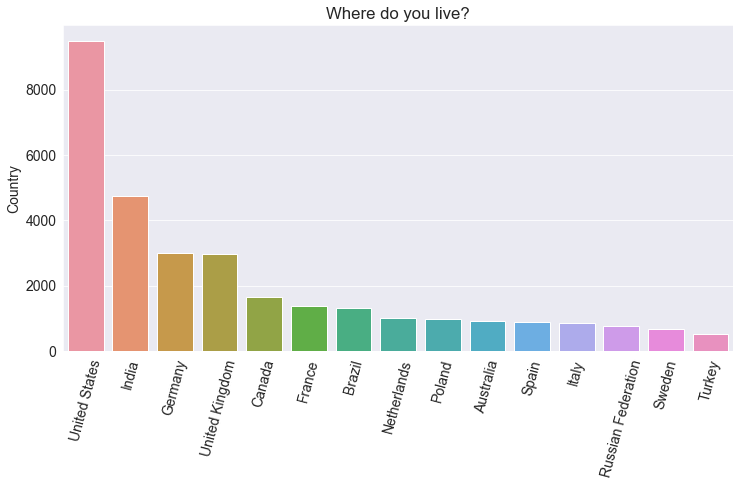

In [137]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries)

Có vẻ như số lượng người trả lời cao một cách không cân đối đến từ Hoa Kỳ và Ấn Độ, có thể là do cuộc khảo sát được thực hiện bằng tiếng Anh và những quốc gia này có dân số nói tiếng Anh cao nhất. Chúng ta có thể thấy rằng cuộc khảo sát có thể không mang tính đại diện cho cộng đồng lập trình toàn cầu - đặc biệt là từ các quốc gia không nói tiếng Anh. Các lập trình viên từ các quốc gia không nói tiếng Anh gần như chắc chắn không có đủ đại diện.

Hãy tạo bản đồ Choropleth để hình dung rõ hơn phản ứng tương đối từ nhiều quốc gia khác nhau.

In [138]:
import folium 

In [139]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [140]:
country_counts = survey_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

Country  Count
0      United States   9493
1              India   4760
2            Germany   3004
3     United Kingdom   2963
4             Canada   1660
..               ...    ...
165            Nauru      1
166           Monaco      1
167      Timor-Leste      1
168  Solomon Islands      1
169      Saint Lucia      1

[170 rows x 2 columns]

In [141]:
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[12, 'Country'] = 'Russia'

In [142]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 13_000],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

### 4.2 Age

Sự phân bố độ tuổi của người trả lời là một yếu tố quan trọng khác cần xem xét. Chúng ta có thể sử dụng biểu đồ và biểu đồ hình hộp để hình dung sự phân bố của nó.

In [143]:
import plotly.express as px
px.histogram(survey_df, x="Age", marginal="box", title='Age of Respondents')

- *Nhận xét*: 
    - Có vẻ như phần lớn người trả lời ở độ tuổi 20-40. Nó phần nào đại diện cho cộng đồng lập trình nói chung. Nhiều người trẻ đã chọn khoa học máy tính làm lĩnh vực học tập hoặc nghề nghiệp của họ trong 20 năm qua.
    - Tuy nhiên có những người trên 80 tuổi vẫn đang làm lập trình, đó là những khảo sát không chắc chắn

### 4.3 Gander

Hãy xem xét sự phân bổ các câu trả lời cho "Giới tính". Một thực tế rõ ràng là phụ nữ và giới tính không thuộc giới tính nhị phân không được đại diện nhiều trong cộng đồng lập trình, vì vậy chúng ta có thể mong đợi sẽ thấy sự phân bổ sai lệch ở đây.

In [144]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [145]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  41540
Woman                                                 3509
Non-binary, genderqueer, or gender non-conforming      335
Name: Gender, dtype: int64

Biểu đồ piechart sẽ là một cách tuyệt vời để hình dung sự phân bổ.

In [146]:
import matplotlib.pyplot as plt 
import seaborn 

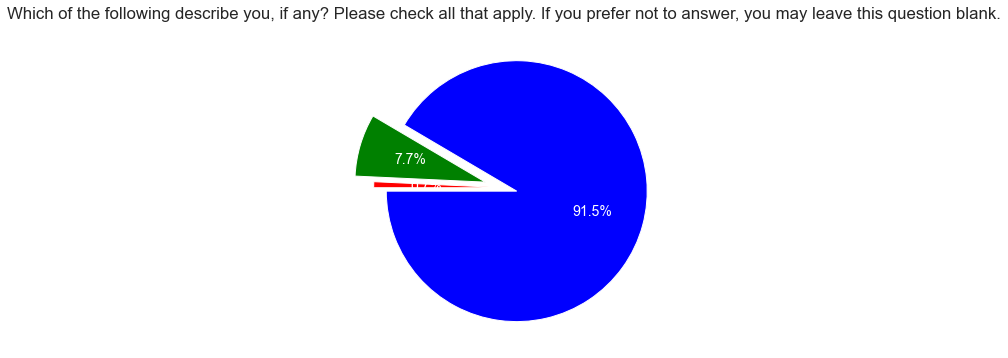

In [147]:
palette_color = seaborn.color_palette('dark') 
fbcolor = ["blue", "green", "red", "orange"]

# declaring exploding pie 
explode = [0.1, 0.15, 0] 

plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index,
        explode=explode, autopct='%1.1f%%', startangle=180 , colors=fbcolor, textprops={'color':"w"})

plt.show()

- Nhận xét:
    - Chỉ có khoảng 7.7% số người trả lời khảo sát đã trả lời câu hỏi xác định là phụ nữ hoặc không thuộc giới nhị phân. Con số này thấp hơn tỷ lệ phần trăm chung của phụ nữ và giới tính không nhị phân trong cộng đồng lập trình

### 4.4 Education Level

Giáo dục chính quy về khoa học máy tính thường được coi là một yêu cầu thiết yếu để trở thành một lập trình viên. Tuy nhiên, có rất nhiều tài nguyên và hướng dẫn miễn phí có sẵn trực tuyến để học lập trình. Hãy so sánh trình độ học vấn của những người được hỏi để hiểu rõ hơn về vấn đề này. Chúng ta sẽ sử dụng biểu đồ thanh ngang ở đây.

Text(0, 0.5, '')

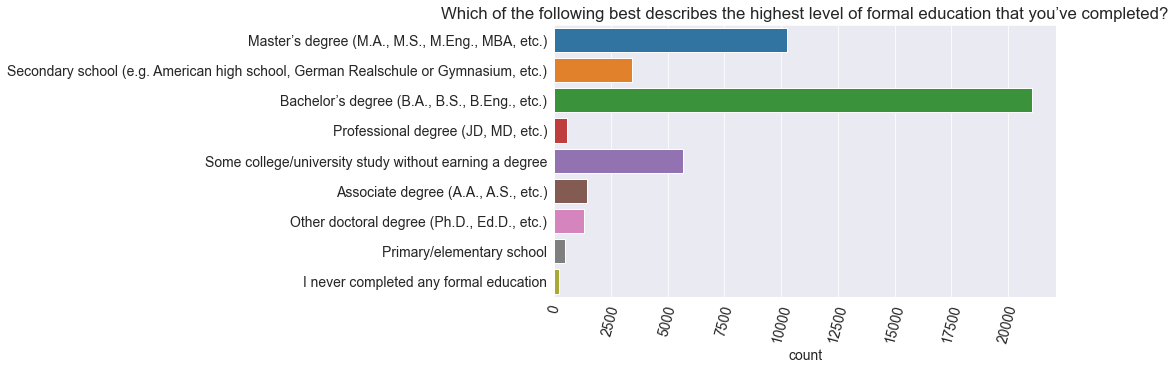

In [149]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema['EdLevel'])
plt.ylabel(None)

Có vẻ như hơn một nửa số người được hỏi có bằng cử nhân hoặc thạc sĩ, vì vậy hầu hết các lập trình viên đều có trình độ đại học. Tuy nhiên, chỉ dựa vào biểu đồ này thì không rõ liệu họ có bằng cấp về khoa học máy tính hay không.

Chúng ta cũng hãy vẽ đồ thị các chuyên ngành đại học, nhưng lần này chúng ta sẽ chuyển đổi các số thành tỷ lệ phần trăm và sắp xếp các giá trị để dễ hình dung thứ tự hơn.

In [150]:
schema.UndergradMajor

'What was your primary field of study?'

Text(0.5, 0, 'Percentage')

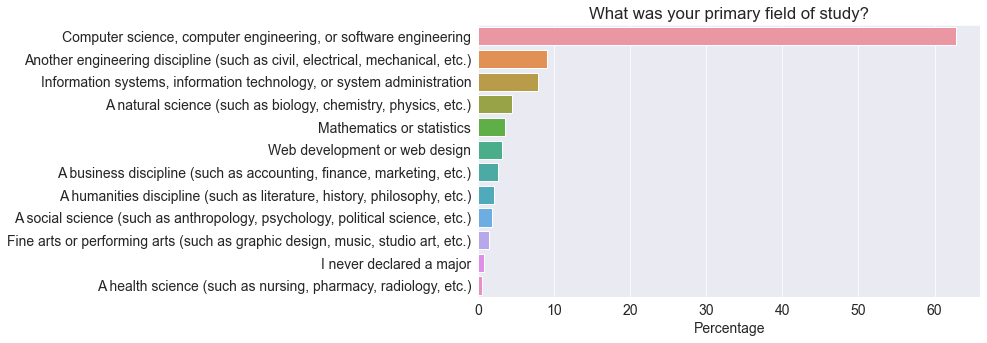

In [151]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')

Hóa ra 40% lập trình viên có bằng đại học có lĩnh vực nghiên cứu khác ngoài khoa học máy tính - điều này rất đáng khích lệ. Có vẻ như gợi ý rằng mặc dù giáo dục đại học nói chung là hữu ích nhưng bạn không cần phải theo đuổi chuyên ngành khoa học máy tính để trở thành một lập trình viên thành công.

### 4.5 Employment

Làm việc tự do hoặc làm việc theo hợp đồng là lựa chọn phổ biến của các lập trình viên, vì vậy sẽ rất thú vị khi so sánh sự phân chia giữa công việc toàn thời gian, bán thời gian và tự do. Hãy trực quan hóa dữ liệu từ cột Việc làm.


In [152]:
schema.Employment

'Which of the following best describes your current employment status?'

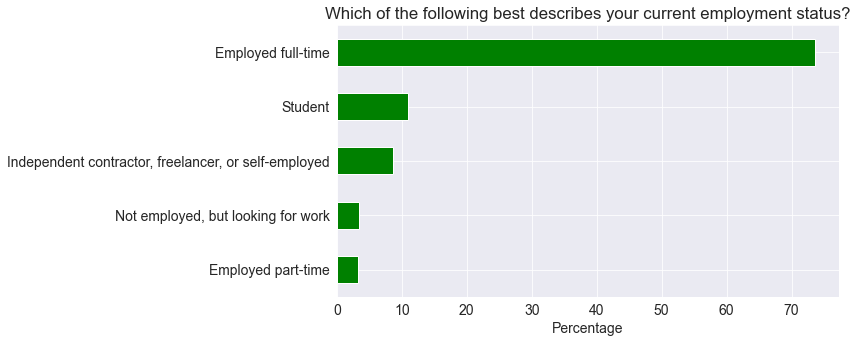

In [153]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

Có vẻ như gần 10% số người được hỏi đang làm việc bán thời gian hoặc làm nghề tự do.

Trường `DevType` chứa thông tin về vai trò của người trả lời. Vì câu hỏi cho phép có nhiều câu trả lời nên cột chứa danh sách các giá trị được phân tách bằng dấu chấm phẩy ;, khiến việc phân tích trực tiếp khó hơn một chút.

In [154]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [155]:
survey_df.DevType.value_counts()


Developer, full-stack                                                                                                                                                                                                                                                          3557
Developer, back-end                                                                                                                                                                                                                                                            2486
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                 1912
Developer, back-end;Developer, full-stack                                                                                                                                   

Hãy xác định hàm trợ giúp biến một cột chứa danh sách các giá trị (như Survey_df.DevType) thành khung dữ liệu với một cột cho mỗi tùy chọn có thể.

In [156]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [157]:
dev_type_df = split_multicolumn(survey_df.DevType)


In [158]:
dev_type_df


Developer, desktop or enterprise applications  \
Respondent                                                  
1                                                    True   
4                                                   False   
6                                                   False   
8                                                    True   
9                                                   False   
...                                                   ...   
65414                                               False   
65467                                               False   
65503                                               False   
65584                                               False   
65629                                               False   

            Developer, full-stack  Designer  Developer, front-end  \
Respondent                                                          
1                            True     False                 False   
4                           False     False                 False   
6                           False      True                  True   
8                           False     False                 False   
9                            True     False                 False   
...                           ...       ...                   ...   
65414                        True      True                 False   
65467                       False     False                 False   
65503                       False     False                 False   
65584                       False     False                 False   
65629                        True     False                  True   

            Developer, mobile  Developer, back-end  \
Respondent                                           
1                       False                False   
4                       False                False   
6                        True                False   
8                       False                 True   
9                       False                False   
...                       ...                  ...   
65414                   False                False   
65467                   False                 True   
65503                   False                False   
65584                   False                 True   
65629                   False                 True   

            Developer, game or graphics  Database administrator  \
Respondent                                                        
1                                 False                   False   
4                                 False                   False   
6                                 False                   False   
8                                  True                   False   
9                                 False                   False   
...                                 ...                     ...   
65414                             False                   False   
65467                             False                   False   
65503                             False                   False   
65584                             False                   False   
65629                             False                   False   

            Developer, embedded applications or devices  \
Respondent                                                
1                                                 False   
4                                                 False   
6                                                 False   
8                                                 False   
9                                                 False   
...                                                 ...   
65414                                             False   
65467                                             False   
65503                                             False   
65584                                             False   
65629                                

`Dev_type_df` có một cột cho mỗi tùy chọn có thể được chọn làm phản hồi. Nếu người trả lời đã chọn một tùy chọn thì giá trị của cột tương ứng là `True`. Nếu không thì là `False`.

Bây giờ chúng ta có thể sử dụng tổng số theo cột để xác định các vai trò phổ biến nhất.

In [159]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              22448
Developer, full-stack                            22424
Developer, front-end                             14922
Developer, desktop or enterprise applications     9657
Developer, mobile                                 7566
DevOps specialist                                 5038
Database administrator                            4569
System administrator                              4185
Designer                                          4054
Developer, embedded applications or devices       3737
Developer, QA or test                             3218
Data scientist or machine learning specialist     3142
Data or business analyst                          3071
Engineer, data                                    2989
Academic researcher                               2680
Educator                                          2287
Developer, game or graphics                       2190
Engineering manager                               2108
Product ma

In [160]:
from wordcloud import WordCloud
survey_df.DevType


Respondent
1                                  Developer, desktop or enterprise applications;Developer, full-stack
4                                                                                                  NaN
6                                                      Designer;Developer, front-end;Developer, mobile
8        Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics
9                                                                                Developer, full-stack
                                                     ...                                              
65414                                               Academic researcher;Designer;Developer, full-stack
65467                                                                              Developer, back-end
65503                                                                                              NaN
65584                                                         

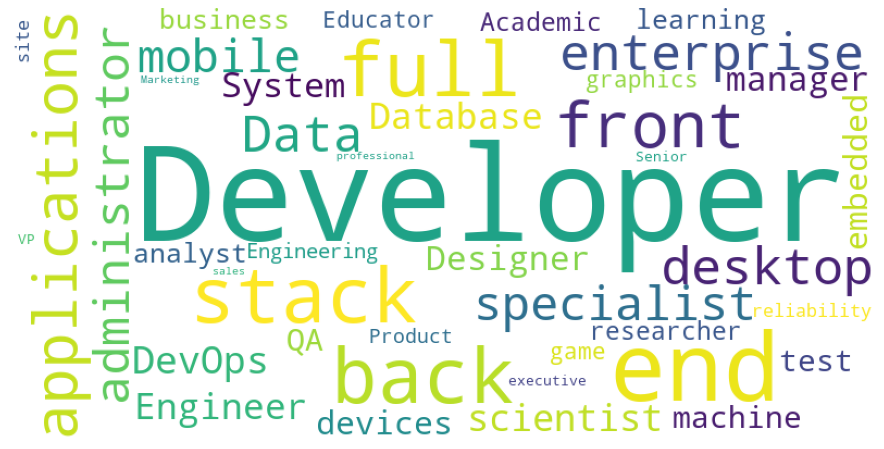

In [161]:
words = ' '.join((job for job in survey_df.DevType.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc)

### 4.6 Compensation vs. Working Hours

Hãy hình dung mối quan hệ giữa giờ làm việc và lương thưởng ở hai quốc gia: Mỹ và Ấn Độ. Chúng ta có thể làm điều này bằng cách sử dụng một biểu đồ phân tán.

In [162]:
survey_df.columns


Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck', 'Employment',
       'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime',
       'NEWEdImpt', 'ConvertedComp'],
      dtype='object')

In [163]:
usa_df = survey_df[survey_df.Country.isin(['United States', 'India'])]

px.scatter(usa_df, x='WorkWeekHrs', y='ConvertedComp', color='Country')

Hãy hình dung việc phân bổ thù lao và số giờ làm việc một cách độc lập.

In [164]:
px.histogram(survey_df, x="WorkWeekHrs", title='Hours of Work Per Week', nbins=40)


In [165]:
px.histogram(survey_df, x="ConvertedComp", marginal="box", title='Compensation of Respondents')


---

## Đặt câu hỏi 

Sau khi khám phá dữ liệu, ta đã hiểu hơn về dữ liệu. Bây giờ, ta hãy xem thử có câu hỏi nào có thể được trả lời bằng dữ liệu này.

**Một câu hỏi có thể có là:** Platform nào (Windows, Linux, Docker, AWS, ...) được yêu thích nhất, platform nào được yêu thích nhì, platform nào được yêu thích ba, ...?

Một platform được xem là được yêu thích nếu một người đã dùng platform này (cột "PlatformWorkedWith") và muốn tiếp tục dùng platform trong năm kế (cột "PlatformDesireNextYear").

**Trả lời được câu hỏi này sẽ** phần nào giúp ta định hướng là nên tập trung học platform nào để có thể chuẩn bị cho tương lai

In [120]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

C#  HTML/CSS  JavaScript   Java  Python    SQL    PHP  Swift  \
Respondent                                                                    
1            True      True        True  False   False  False  False  False   
4           False     False       False  False   False  False  False  False   
6           False      True        True   True   False  False  False  False   
8           False     False       False  False    True   True  False  False   
9           False      True        True  False   False  False   True  False   
...           ...       ...         ...    ...     ...    ...    ...    ...   
65414       False      True        True  False   False   True   True  False   
65467       False      True        True   True   False   True  False  False   
65503       False      True        True   True   False   True  False  False   
65584        True      True        True  False   False   True  False  False   
65629       False     False       False  False   False  False  False  False   

                C  TypeScript  Bash/Shell/PowerShell  Kotlin      R    VBA  \
Respondent                                                                   
1           False       False                  False   False  False  False   
4           False       False                  False   False  False  False   
6           False       False                  False   False  False  False   
8           False       False                  False   False  False  False   
9           False       False                  False   False  False  False   
...           ...         ...                    ...     ...    ...    ...   
65414       False       False                  False   False  False  False   
65467       False       False                  False    True  False  False   
65503        True       False                   True   False  False  False   
65584       False       False                  False   False  False  False   
65629       False       False                  False   False  False  False   

             Perl  Objective-C  Scala    C++   Ruby     Go  Haskell   Rust  \
Respondent                                                                   
1           False        False  False  False  False  False    False  False   
4           False        False  False  False  False  False    False  False   
6           False        False  False  False  False  False    False  False   
8           False        False  False  False  False  False    False  False   
9           False        False  False  False  False  False    False  False   
...           ...          ...    ...    ...    ...    ...      ...    ...   
65414       False        False  False  False  False  False    False  False   
65467       False        False  False  False  False  False    False  False   
65503       False        False  False   True  False  False    False  False   
65584       False        False  False  False  False  False    False  False   
65629       False        False  False  False  False  False    False  False   

             Dart  Julia  Assembly  
Respondent                          
1           False  False     False  
4           False  False     False  
6           False  False     False  
8           False  False     False  
9           False  False     False  
...           ...    ...       ...  
65414       False  False     False  
65467       False  False     False  
65503       False  False     False  
65584       False  False     False  
65629       False  False     False  

[45384 rows x 25 columns]

In [121]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               68.167195
HTML/CSS                 63.011193
SQL                      55.750925
Python                   43.711440
Java                     39.630707
Bash/Shell/PowerShell    34.421823
C#                       31.693989
TypeScript               26.487308
PHP                      25.323903
C++                      22.812004
C                        20.482990
Go                        8.906222
Kotlin                    7.859598
Ruby                      7.236030
Swift                     5.825842
VBA                       5.792790
Assembly                  5.733298
R                         5.642958
Rust                      4.975322
Objective-C               4.019038
Dart                      3.745814
Scala                     3.706152
Perl                      2.992244
Haskell                   1.927992
Julia                     0.771197
dtype: float64

Text(0.5, 0, 'count')

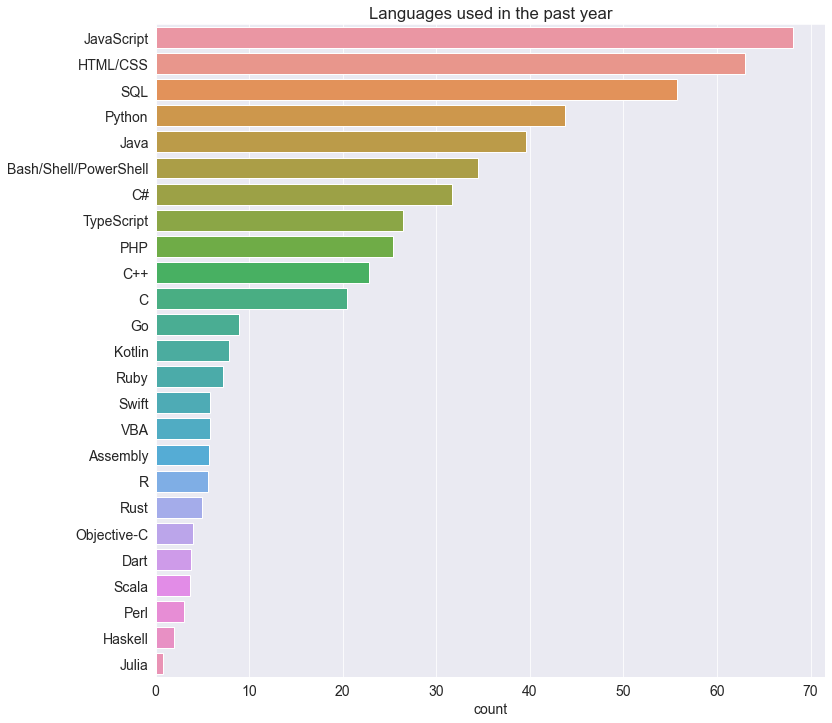

In [122]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year")
plt.xlabel('count')

---

## Đặt câu hỏi

Sau khi khám phá dữ liệu, chúng ta đã hiểu rõ hơn về dữ liệu. Chúng ta có thể nghĩ ra nhiều câu hỏi ví dụ như:Top những loại nhà phát triển phổ biến nhất; Thống kê mức lương theo nhà phát triển hoặc kinh nghiệm; Thống kê kinh nghiệm của người lập trình dựa trên năm từ khi học lập trình; Thống kê tầm quan trọng của việc được giáo dục chính thức; ... v.v

Chúng ta sẽ trình bày về các yếu tố công việc nào quan trọng nhất đối với Dev.

---

**Câu hỏi có thể đặt ra là:** Khảo sát yếu tố nào ảnh hưởng nhiều nhất đến sự lựa chọn công việc(JobFactors (Languages, frameworks, and other technologies I’d be working with, Remote work options, Flex time or a flexible schedule, ...  ))
   - Một JobFactors được gọi là yêu thích nhất nếu tỉ lệ người chọn cao nhất.
   - Chúng ta sẽ kiểm soát về giới tính(Gender(Man;Woman;Non-binary, genderqueer, or gender non-conforming)) ,sự khác nhau về giới tính sẽ ảnh hưởng thế nào đến yếu tố lựa chọn công việc.
Ngày nay có rất nhiều định kiến trong công việc, xã hội tự đóng khung một vài nghề nghiệp cho "chỉ nam"; "chỉ nữ" hoặc "giới tính thứ 3".
Dựa trên JobFactors chúng ta có thể phần nào phỏng đoán được xu hướng các yếu tố chọn công việc của mỗi giới tính và trực quan về yếu tố chọn công việc ngày nay.

## Khảo sát yếu tố công việc



## Tiền xử lý để chuẩn bị dữ liệu cho bước phân tích để trả lời cho câu hỏi của chúng ta

In [68]:
def exploreData(multichoice , temp_df): 
    temp_df = survey_df.dropna(subset=[multichoice])
    data_plat = map(lambda x: x.split(';'),temp_df[multichoice].array)
    temp_df[multichoice]  = pd.Series(data_plat, index = temp_df[multichoice].index)
    temp_df = temp_df.explode(multichoice) 
    return temp_df

Hàm này dùng để Explore các hàng có nhiều choice , và sẽ nhân đôi các hàng này.

---

## Phân tích dữ liệu để ra câu trả lời cho câu hỏi của bạn

Bây giờ, chúng ta sẽ thực hiện phân tích dữ liệu để trả lời cho câu hỏi ở trên. Cụ thể các bước như sau:

- **Phần 1:** Khảo sát chung về những yếu tố công việc quan trọng nhất 
    - Bước 1: tính Series `most_loved_Factors`, trong đó: 
        - Index là tên JobFactors
        - Data là tỉ lệ % (từ 0 đến 100, được làm tròn với một chữ số thập phân bằng phương thức `round(1)`) được yêu thích (được sort tăng dần) 
    - Bước 2: từ Series `most_loved_Factors`, mình chuyển sang dataframe df (đặt tên cho cột value là All People)
        - Mình cho các bar nằm ngang (cho dễ nhìn vì các index khá dài)
        - Mình đặt tên trục tung là "Factors"
        - Mình đặt tên trục hoành là "Percent %"
        - Mình đặt tên cho bảng là "Job Factors"


In [69]:
Fac_df = exploreData('JobFactors' , survey_df)
NotNull_df = survey_df.dropna(subset=['JobFactors']) 
count_ = Counter(Fac_df['JobFactors'])
for key in count_.keys():
    count_[key] = round((count_[key]/NotNull_df.shape[0])*100,1)

most_loved_Factors = pd.Series(data = dict(count_), index = count_.keys())
most_loved_Factors = most_loved_Factors.sort_values(ascending=False)
df = pd.DataFrame (most_loved_Factors)
df=df.rename(columns = {0:'All People'})
df

All People
Languages, frameworks, and other technologies I’d be working with             51.4
Office environment or company culture                                         44.6
Flex time or a flexible schedule                                              43.9
Opportunities for professional development                                    41.4
Remote work options                                                           33.3
How widely used or impactful my work output would be                          20.9
Industry that I’d be working in                                               15.3
Family friendliness                                                           12.1
Financial performance or funding status of the company or organization        11.9
Specific department or team I’d be working on                                 11.8
Diversity of the company or organization                                       6.7

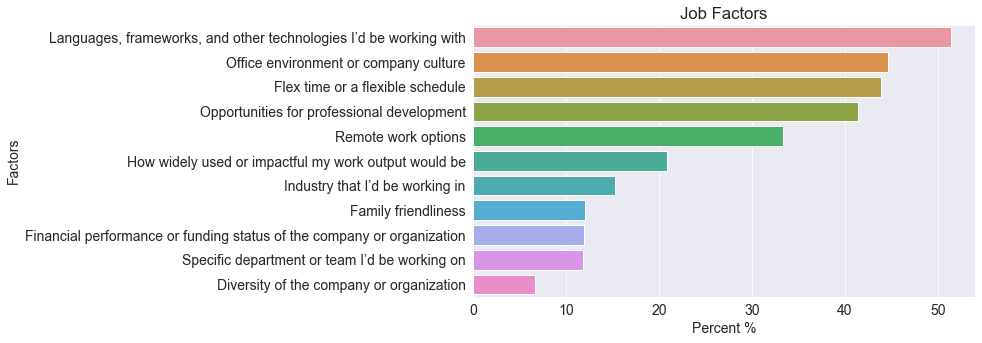

In [80]:
sns.barplot(x=df['All People'], y=df.index)
plt.title('Job Factors')
plt.ylabel('Factors')
plt.xlabel('Percent %')
plt.show()


**Phần 2:** Khảo sát về những yếu tố công việc quan trọng nhất đối với mỗi giới tính
- Bước 1: tính Series `most_gender_loved`, trong đó: 
    - Index là tên JobFactors
    - Data là tỉ lệ % (từ 0 đến 100, được làm tròn với một chữ số thập phân bằng phương thức `round(1)`) được yêu thích (được sort tăng dần) 
- Bước 2: từ Series `most_gender_loved`, mình chuyển sang dataframe df , trong đó:
    - Lưu kết quả các dataframe từ việc kết hợp các `Gender` vào dataframe mới là newDF
    - Mình đặt tên trục tung là "Factors"
    - Mình đặt tên trục hoành là "Percent %"
    - Mình đặt tên cho bảng là "Gender and Factors"

In [84]:

survey_df = survey_df.dropna(subset=['Gender', 'JobFactors'])
Gender_df = exploreData('Gender' , survey_df )
GenvsJob_df = exploreData('JobFactors' , survey_df)

temp_df_index = Gender_df[~Gender_df['Gender'].duplicated(keep='first')]
Series_value = temp_df_index['Gender'].values
newDF = pd.DataFrame()
for i in range(0,len(Series_value)):
    new_df = GenvsJob_df[GenvsJob_df.Gender == Series_value[i]]
    sample_df = Gender_df[Gender_df.Gender == Series_value[i]]
    cout_ = Counter(new_df['JobFactors'])
    for key in cout_.keys():
        cout_[key] = round((cout_[key]/sample_df.shape[0])*100,1)
    most_gender_loved = pd.Series(data = dict(cout_),dtype = 'object', index = cout_.keys())
    most_gender_loved = most_gender_loved.sort_values(ascending=False)
    df_ = pd.DataFrame(most_gender_loved)
    df_= df_.rename(columns = {0:f'{Series_value[i]}'})
    newDF = pd.concat([newDF, df_],axis=1)
newDF


Man  \
Languages, frameworks, and other technologies I’d be working with       52.9   
Office environment or company culture                                   44.5   
Flex time or a flexible schedule                                        44.1   
Opportunities for professional development                              41.5   
Remote work options                                                     33.6   
How widely used or impactful my work output would be                    21.0   
Industry that I’d be working in                                         15.4   
Family friendliness                                                     12.2   
Financial performance or funding status of the company or organization  12.1   
Specific department or team I’d be working on                           11.7   
Diversity of the company or organization                                 5.4   

                                                                       Woman  \
Languages, frameworks, and other technologies I’d be working with       41.6   
Office environment or company culture                                   48.6   
Flex time or a flexible schedule                                        46.0   
Opportunities for professional development                              41.5   
Remote work options                                                     32.3   
How widely used or impactful my work output would be                    20.0   
Industry that I’d be working in                                         14.0   
Family friendliness                                                     10.7   
Financial performance or funding status of the company or organization   8.8   
Specific department or team I’d be working on                           12.5   
Diversity of the company or organization                                18.2   

                                                                       Non-binary, genderqueer, or gender non-conforming  
Languages, frameworks, and other technologies I’d be working with                                                   37.6  
Office environment or company culture                                                                               54.3  
Flex time or a flexible schedule                                                                                    41.8  
Opportunities for professional development                                                                          25.4  
Remote work options                                                                                                 33.1  
How widely used or impactful my work output would be                                                                23.6  
Industry that I’d be working in                                                                                     20.3  
Family friendliness                                                                                                  7.5  
Financial performance or funding status of the company or organization                                               6.9  
Specific department or team I’d be working on                                                                       10.1  
Diversity of the company or organization                                                                            34.0

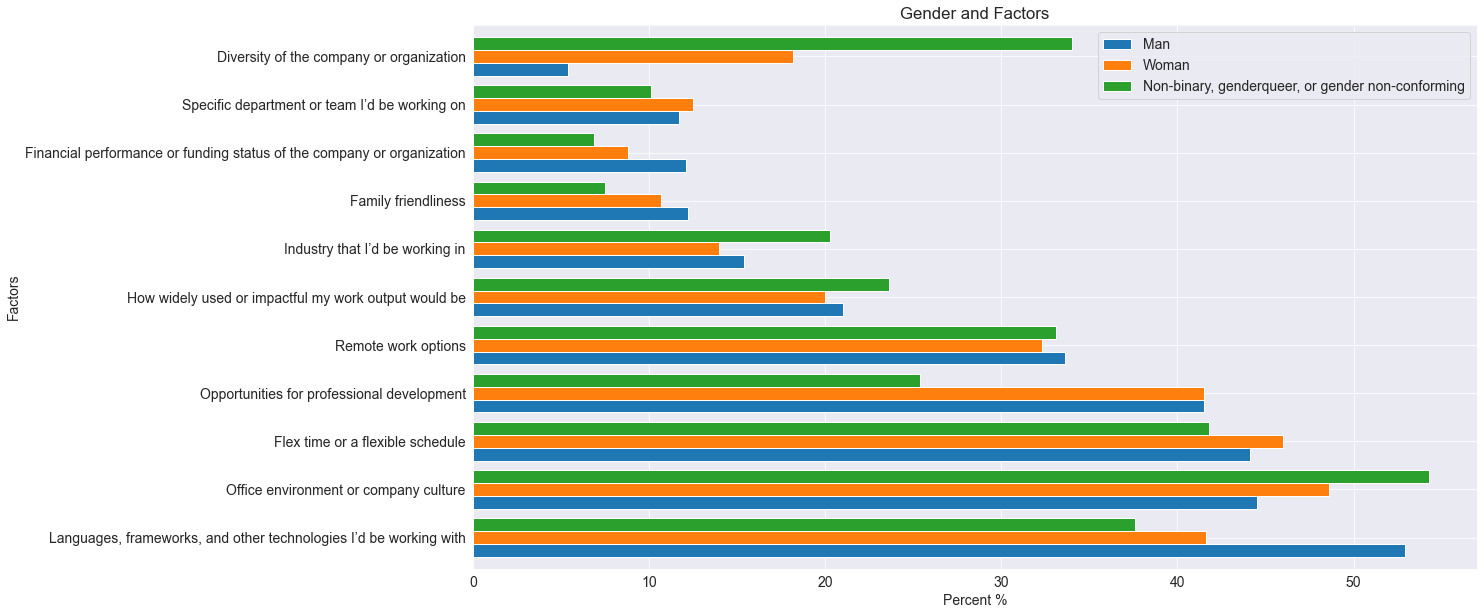

In [108]:
newDF.plot(kind='barh', stacked=False, width=0.8 , figsize = (18, 10))
plt.title('Gender and Factors')
plt.ylabel('Factors')
plt.xlabel('Percent %')
plt.show()

### Kết luận
Chúng ta đã rút ra nhiều kết luận từ cuộc khảo sát. Dưới đây là tóm tắt về một vài trong số đó:

- Hoa Kỳ, Ấn Độ và Đức là ba quốc gia hàng đầu có số lượng Lập trình viên hoặc Nhà phát triển nhiều nhất.

- Số lượng lập trình viên tối đa tiếp xúc với mã hóa lần đầu ở độ tuổi từ 20 đến 40.

- Nhiều lập trình viên lần đầu tiên tiếp xúc với mã hóa sau 40 tuổi, điều đó có nghĩa là mọi người có thể bắt đầu muộn trong lĩnh vực lập trình.

- Hầu hết các lập trình viên chuyên nghiệp đều ở độ tuổi từ 20 đến 45.

- Gần 70% người trả lời khảo sát là Chuyên gia làm việc toàn thời gian.

- Có một lượng đáng kể Lập trình viên hiện đang là sinh viên hoặc người làm việc tự do.

- Gần 70% lập trình viên có bằng Cử nhân hoặc Thạc sĩ.

- Hầu hết các lập trình viên đều có một số nền tảng Giáo dục.

- Khoảng 50% lập trình viên không xuất thân từ nền tảng Khoa học Máy tính hoặc Công nghệ thông tin.

- Các quốc gia châu Á và châu Phi có số giờ làm việc trong tuần cao hơn.

- Số giờ làm việc trung bình trên toàn thế giới của một lập trình viên trong một tuần là 41,6 g
iờ.
- JavaScript, HTML/CSS, SQL, Python là những ngôn ngữ được các nhà phát triển sử dụng nhiều nhất trong senario hiện nay.

- Hơn 50% lập trình viên sử dụng JavaScript và HTML/CSS.

- Python và JavaScript là ngôn ngữ được ưa thích nhất để sử dụng trong tương lai.

- Các ngôn ngữ lập trình mới như Rust, Go và TypeScript đang ngày càng trở nên phổ biến hơn, vì vậy một lập trình viên mới có thể thích những ngôn ngữ này cho phạm vi tương lai.

- Hơn 90% lập trình viên là Nam giới và chúng ta cần thực hiện một số bước để thúc đẩy các giới tính khác theo đuổi lập trình như Feild chuyên nghiệp.